In [51]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os                                                                       
import numpy as np    
import scipy as sp
import time
import h5py
import pandas as pd
import pickle
from collections import OrderedDict
from IPython.display import IFrame
from IPython.display import Image
import data.data_selector as ds
from data.dataset import Dataset
import data.vanHateren as vh
import utils.rd_plot_functions as pf                                               
import utils.data_processing as dp 
import utils.notebook as nb
import utils.log_parser as lp
import params.param_picker as pp
sns.set_style('darkgrid')

# Model comparisons

In [39]:
rd_alts = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/alt_mods/coeffs/rd_alts')
rd_lca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/nowht_v3/coeffs/rd_256_v3')
rd_rg = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/rg_zca/coeffs/rd_rg_zca_wht_v2_test')

In [41]:
frames = [rd_alts, rd_rg]
rd_alts = pd.concat(frames)
rd_alts = rd_alts.sort_values(['model', 'n_bins'])
rd_lca = rd_lca.sort_values(['model', 'n_bins'])

## Alternative models

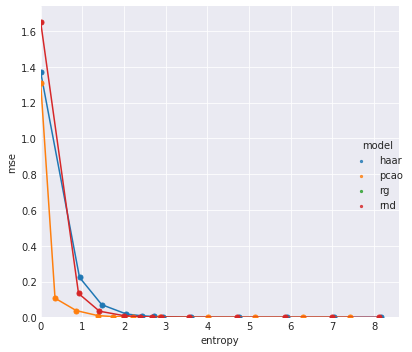

In [44]:
pf.alt_models_plots(rd_alts, y='mse')

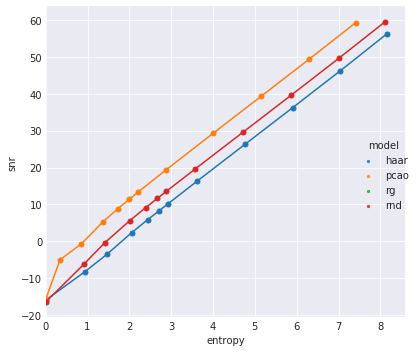

In [45]:
pf.alt_models_plots(rd_alts, y='snr')

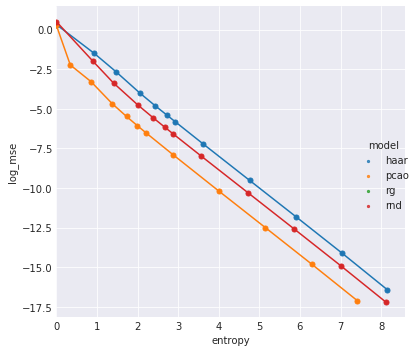

In [46]:
pf.alt_models_plots(rd_alts, y='log_mse')

## Full comparisons

In [49]:
rd_lca2 = rd_lca.where(rd_lca['lambda'] != '0.1')

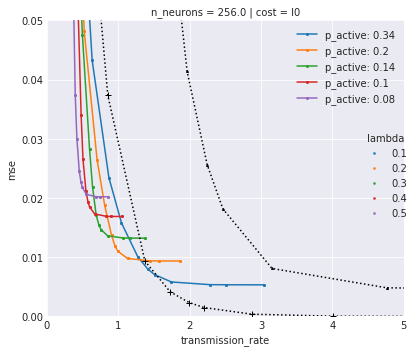

In [47]:
pf.full_comparison_plots(rd_lca.where(rd_lca['n_neurons'] == 256), pca_table=rd_alts.where(rd_alts.model=='pcao'), rnd_table=rd_rg, ica_table=rd_alts.where(rd_alts.model=='ica_v1.0'), y='mse', x='transmission_rate',xlim=5.0,  ylim=0.05)